In [2]:
!pip install --upgrade pip


  Attempting uninstall: pip
    Found existing installation: pip 20.2
    Uninstalling pip-20.2:
      Successfully uninstalled pip-20.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np



In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
img = image.load_img(r"CNN/basedata/train/happy/gettyimages-1132119295-612x612.jpg")

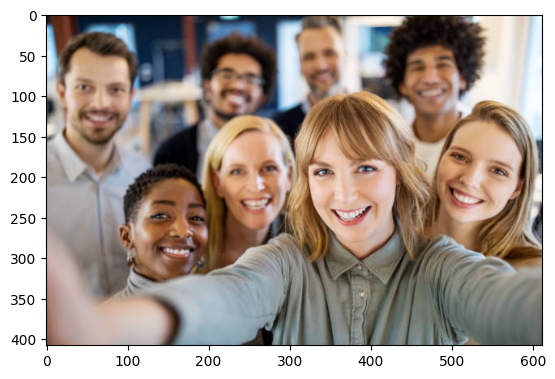

In [4]:
plt.imshow(img)

In [40]:
cv2.imread(r"CNN/basedata/train/happy/gettyimages-1132119295-612x612.jpg").shape

(408, 612, 3)

In [6]:
train = ImageDataGenerator(rescale=1./251)
validation = ImageDataGenerator(rescale = 1./251)

In [7]:

train_dataset = train.flow_from_directory(directory='CNN/basedata/train/',
                                                  target_size=(200, 200),
                                                  batch_size=3,
                                                  class_mode='binary'  # Assuming it's a binary classification task
                                                 )
validation_dataset = validation.flow_from_directory(directory= 'CNN/basedata/validation',
                                       target_size= (200,200),
                                        batch_size = 3,
                                        class_mode = 'binary'
                                       )

Found 79 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=(1, 1), input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=(1, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (4, 4), activation='relu', padding='same', strides=(2, 2)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [21]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [26]:
model_fit =model.fit(train_dataset,
                    steps_per_epoch = 3,
                    epochs= 25,
                    validation_data = validation_dataset)

Epoch 1/25
3/3 [==============================] - 1s 212ms/step - loss: 0.6785 - accuracy: 0.7778 - val_loss: 0.6438 - val_accuracy: 0.7778
Epoch 2/25
3/3 [==============================] - 1s 210ms/step - loss: 0.3772 - accuracy: 0.6667 - val_loss: 0.7311 - val_accuracy: 0.7037
Epoch 3/25
3/3 [==============================] - 1s 207ms/step - loss: 0.3611 - accuracy: 0.8889 - val_loss: 0.6721 - val_accuracy: 0.7407
Epoch 4/25
3/3 [==============================] - 1s 205ms/step - loss: 0.4994 - accuracy: 0.7778 - val_loss: 0.6617 - val_accuracy: 0.7407
Epoch 5/25
3/3 [==============================] - 1s 205ms/step - loss: 0.6811 - accuracy: 0.8889 - val_loss: 0.6560 - val_accuracy: 0.7407
Epoch 6/25
3/3 [==============================] - 1s 214ms/step - loss: 0.3667 - accuracy: 0.7778 - val_loss: 0.6703 - val_accuracy: 0.7037
Epoch 7/25
3/3 [==============================] - 1s 202ms/step - loss: 0.4063 - accuracy: 0.8889 - val_loss: 0.7061 - val_accuracy: 0.8148
Epoch 8/25
3/3 [====

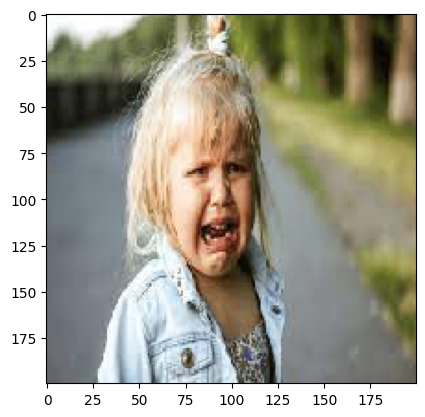

1/1 [==============================] - 0s 27ms/step
NOT HAPPY


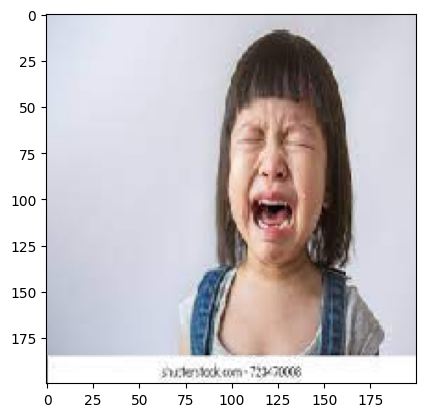

1/1 [==============================] - 0s 29ms/step
HAPPY


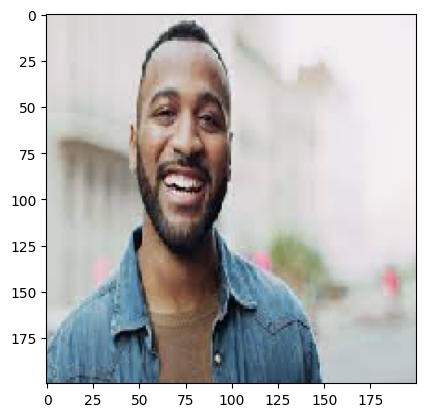

1/1 [==============================] - 0s 20ms/step
NOT HAPPY


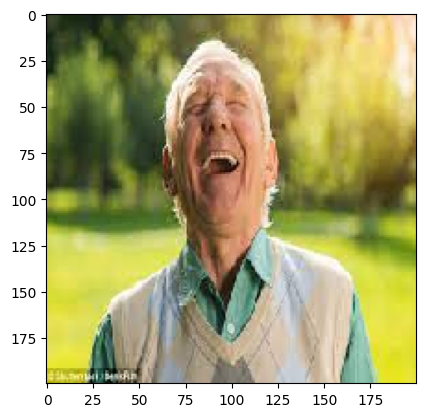

1/1 [==============================] - 0s 31ms/step
NOT HAPPY


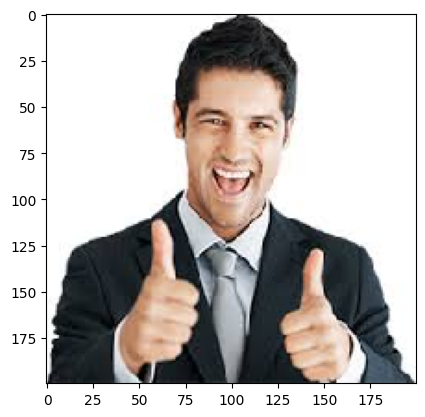

1/1 [==============================] - 0s 31ms/step
NOT HAPPY


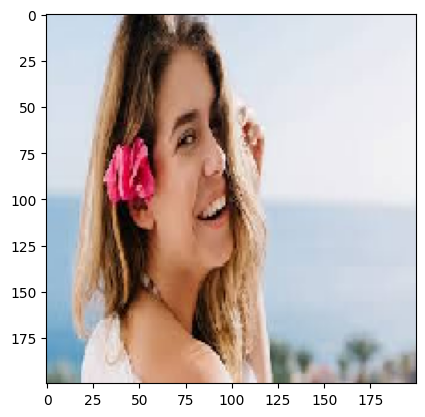

1/1 [==============================] - 0s 25ms/step
HAPPY


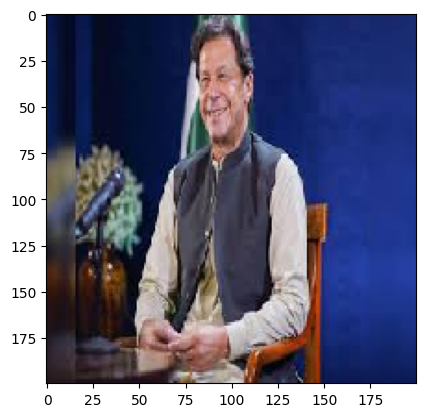

1/1 [==============================] - 0s 49ms/step
HAPPY


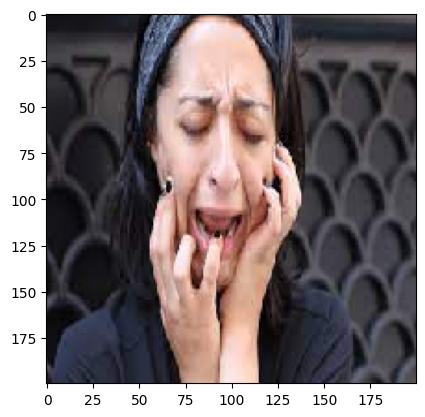

1/1 [==============================] - 0s 27ms/step
NOT HAPPY


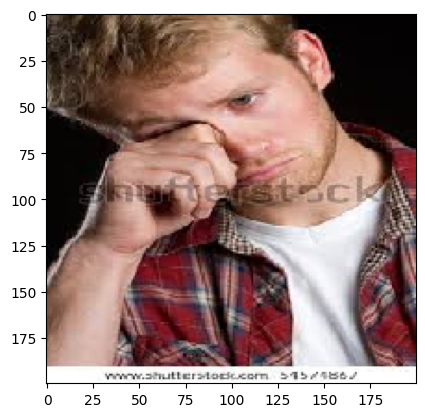

1/1 [==============================] - 0s 23ms/step
HAPPY


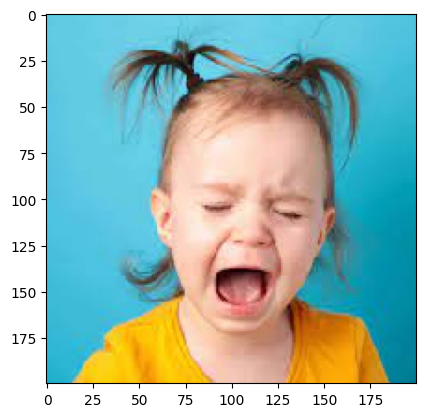

1/1 [==============================] - 0s 26ms/step
NOT HAPPY


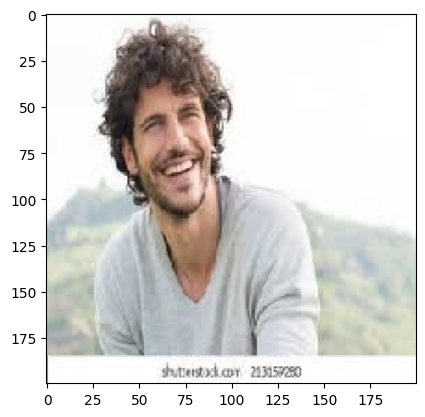

1/1 [==============================] - 0s 42ms/step
HAPPY


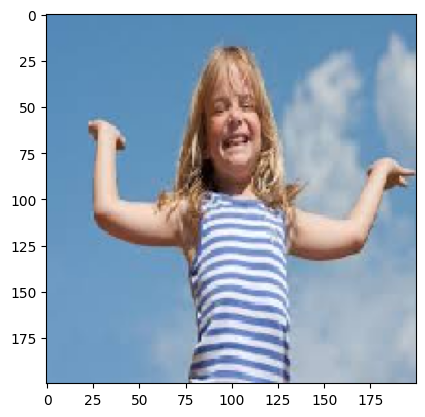

1/1 [==============================] - 0s 24ms/step
HAPPY


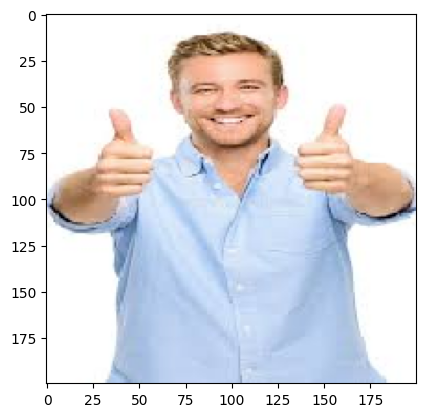

1/1 [==============================] - 0s 24ms/step
HAPPY


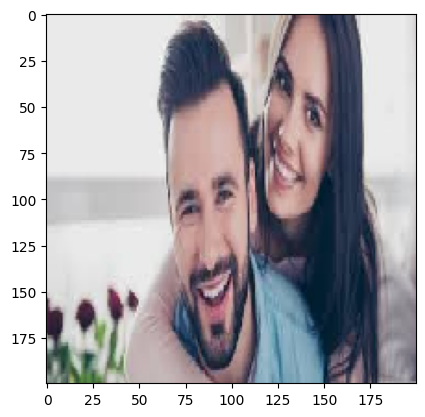

1/1 [==============================] - 0s 45ms/step
HAPPY


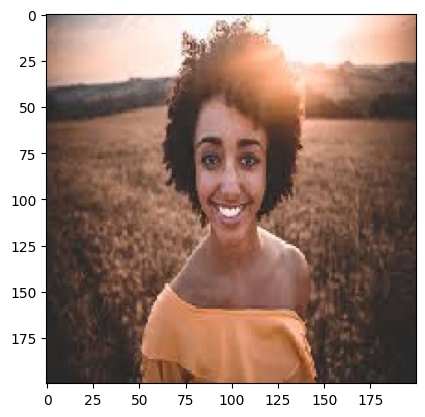

1/1 [==============================] - 0s 32ms/step
HAPPY


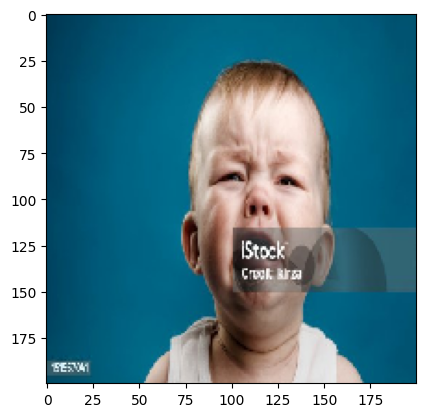

1/1 [==============================] - 0s 38ms/step
NOT HAPPY


In [27]:
dir_path = 'CNN/basedata/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i, target_size=(200,200))
    plt.imshow(img),
    plt.show()
    
    X= image.img_to_array(img)
    X=np.expand_dims(X,axis= 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("NOT HAPPY")
    else:
        print("HAPPY")